In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(600, 600)


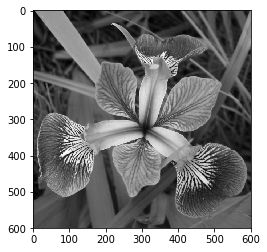

In [2]:
# import a imag and change it to grayscale
# Y = 0.299 R + 0.587 G + 0.114 B
path = 'C:\\David\\iris.jpg'
imag = cv2.imread(path)
# imag = cv2.imread(path, 0)
imag = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)

print(imag.shape)
plt.imshow(imag, cmap=plt.cm.gray)
plt.show()

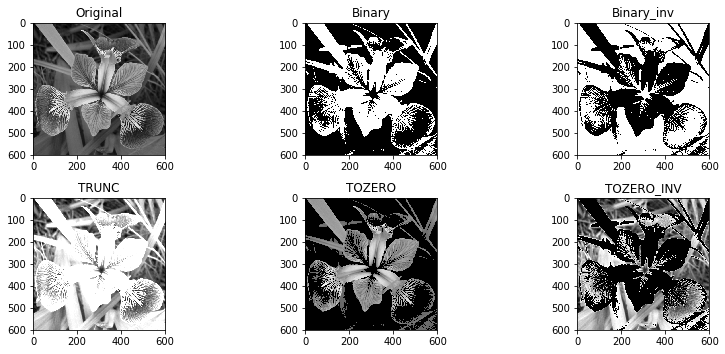

In [3]:
# there are several methods to use single threshold
#函数为cv2.threshold(a, b, c, d) 
#这个函数有四个参数，第一个原图像，第二个进行分类的阈值，第三个是高于（低于）阈值时赋予的新值，第四个是一个方法选择参数

method_list = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC,
              cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]

# note that cv2.threshold will return two items: setting threshold and new imag
imag_list = [imag] + [cv2.threshold(imag, 100, 255, method)[1] for method in method_list]

title_list = ['Original', 'Binary', 'Binary_inv', 'TRUNC', 'TOZERO', 'TOZERO_INV']

plt.figure(figsize=(12,5))

for sub_plt, title ,im in zip([231,232,233,234,235,236], title_list, imag_list):
    plt.subplot(sub_plt)
    plt.imshow(im, cmap= plt.cm.gray)
    plt.title(title)

plt.tight_layout(True)
plt.show()

In [4]:
# 自適threshold
#使用的函数为：cv2.adaptiveThreshold（） 

# 第一個：輸入圖，只能輸入8位元單通道圖。
# 第二個 maxValue：最大值，adaptiveThreshold會將像素分成0和maxValue。
# 第三個 adaptiveMethod：區域閾值方法：可以選擇ADAPTIVE_THRESH_MEAN_C或ADAPTIVE_THRESH_GAUSSIAN_C，兩者決定閾值的方式不同。
# 第四個 thresholdType：二值化型態：有THRESH_BINARY和THRESH_BINARY_INV兩種型態可選。
# 第五個 blockSize：區域尺寸，用幾個像素來決定閾值，只能選擇奇數像3、5、7……等。
# 第六個 C：常數，計算閾值時，要從平均或加權平均減去的數。

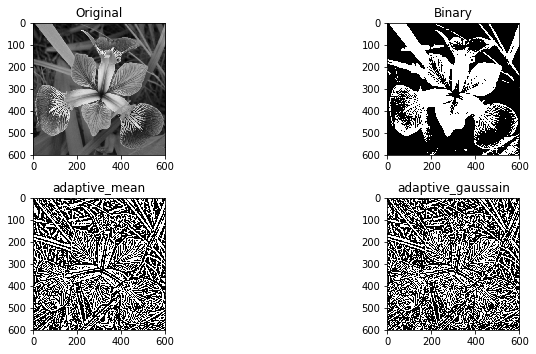

In [5]:
methods_ad = [cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C]
imags_ad = [imag, imag_list[1]] + [cv2.adaptiveThreshold(imag, 255, method, cv2.THRESH_BINARY, 11, 0) for method in methods_ad]

titles_ad = ['Original', 'Binary', 'adaptive_mean', 'adaptive_gaussain']

plt.figure(figsize=(12,5))
for sub_plt, title, im in zip([221,222,223,224], titles_ad, imags_ad):
    plt.subplot(sub_plt)
    plt.imshow(im, cmap= plt.cm.gray)
    plt.title(title)
    
plt.tight_layout(True)
plt.show()

108.0


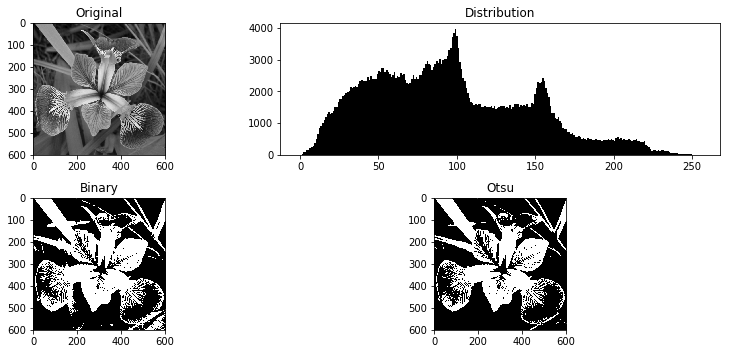

In [8]:
# Otsu's Binary
reval_otsu, imag_otsu = cv2.threshold(imag, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(reval_otsu)

plt.figure(figsize=(12,5))

plt.subplot(221), plt.title('Original') ,plt.imshow(imag, 'gray') # plot Original fig
plt.subplot(222), plt.title('Distribution'), plt.hist(imag.ravel(), 256, color='k') # plot hist
plt.subplot(223), plt.title('Binary'), plt.imshow(imag_list[1], 'gray') # plot Binary 
plt.subplot(224), plt.title('Otsu'), plt.imshow(imag_otsu, 'gray') # plot Otsu

plt.tight_layout(True)
plt.show()